In [33]:
import pandas as pd
from datasets import load_dataset
import numpy as np
from sklearn.linear_model import LinearRegression

### **Load Dataset**

In [3]:
dataset = load_dataset("hao-li/AIDev")

README.md: 0.00B [00:00, ?B/s]

c:\Users\YOGA\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\YOGA\.cache\huggingface\hub\datasets--hao-li--AIDev. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


all_pull_request.parquet:   0%|          | 0.00/331M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset
#each ROW in data set = ONE pull request

DatasetDict({
    train: Dataset({
        features: ['id', 'number', 'title', 'user', 'user_id', 'state', 'created_at', 'closed_at', 'merged_at', 'repo_url', 'repo_id', 'html_url', 'body', 'agent'],
        num_rows: 932791
    })
})

In [ ]:
#convert data set into Pandas dataframe
prs = dataset["train"].to_pandas()

In [ ]:
prs.head()

,id,number,title,user,user_id,state,created_at,closed_at,merged_at,repo_url,repo_id,html_url,body,agent
0,3264016139,1688,`metta code` --> `metta clip` and additional p...,jacklionheart,37011,closed,2025-07-25T18:15:36Z,2025-07-25T19:17:23Z,2025-07-25T19:17:23Z,https://api.github.com/repos/Metta-AI/metta,8.439884e+08,https://github.com/Metta-AI/metta/pull/1688,Remove unused `root_key` variable to fix ruff ...,Claude_Code
1,3264021033,41,feat: Comprehensive ruff error resolution with...,Draco3310,131842369,open,2025-07-25T18:17:57Z,None,None,https://api.github.com/repos/Draco3310/Gal-Fri...,9.920635e+08,https://github.com/Draco3310/Gal-Friday2/pull/41,## 🎯 Mission Accomplished: 100% Ruff Error Res...,Claude_Code
2,3264042289,1600,Add Evals frontend implementation plan and HTM...,justicart,6766889,closed,2025-07-25T18:26:15Z,2025-07-25T23:19:14Z,None,https://api.github.com/repos/bolt-foundry/bolt...,9.267118e+08,https://github.com/bolt-foundry/bolt-foundry/p...,\nCreate comprehensive implementation plan for...,Claude_Code
3,3264042318,1601,Add 4 new BfDs components for Evals interface ...,justicart,6766889,closed,2025-07-25T18:26:16Z,2025-07-25T23:19:11Z,None,https://api.github.com/repos/bolt-foundry/bolt...,9.267118e+08,https://github.com/bolt-foundry/bolt-foundry/p...,\nPhase 1 component creation for the Evals fro...,Claude_Code
4,3264067496,3,🚀 Complete Frontend-Backend API Integration wi...,twitchyvr,42357482,closed,2025-07-25T18:39:14Z,2025-07-25T18:48:47Z,2025-07-25T18:48:47Z,https://api.github.com/repos/twitchyvr/Spaghetti,1.025871e+09,https://github.com/twitchyvr/Spaghetti/pull/3,## 🎯 Summary\n\nThis PR completes the **fronte...,Claude_Code


In [10]:
prs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932791 entries, 0 to 932790
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          932791 non-null  int64  
 1   number      932791 non-null  int64  
 2   title       932790 non-null  object 
 3   user        932791 non-null  object 
 4   user_id     932791 non-null  int64  
 5   state       932791 non-null  object 
 6   created_at  932791 non-null  object 
 7   closed_at   859927 non-null  object 
 8   merged_at   790139 non-null  object 
 9   repo_url    932791 non-null  object 
 10  repo_id     930292 non-null  float64
 11  html_url    932791 non-null  object 
 12  body        924018 non-null  object 
 13  agent       932791 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 99.6+ MB


**Question 1: AI-authored pull requests more likely to be merged or rejected?**

In [15]:
ai_prs = prs[prs["agent"].notna()]
len(ai_prs)

932791

In [17]:
ai_prs = ai_prs[ai_prs["state"].isin(["closed", "merged"])]
ai_prs["state"].value_counts()

state
closed    859927
Name: count, dtype: int64

In [18]:
ai_prs["is_merged"] = ai_prs["merged_at"].notna()
ai_prs["is_merged"].value_counts(normalize=True)

is_merged
True     0.918844
False    0.081156
Name: proportion, dtype: float64

<Axes: title={'center': 'Distribution of Acceptance Decisions for AI-Authored Pull Requests'}, xlabel='Pull Request Outcome', ylabel='Proportion of Pull Requests'>

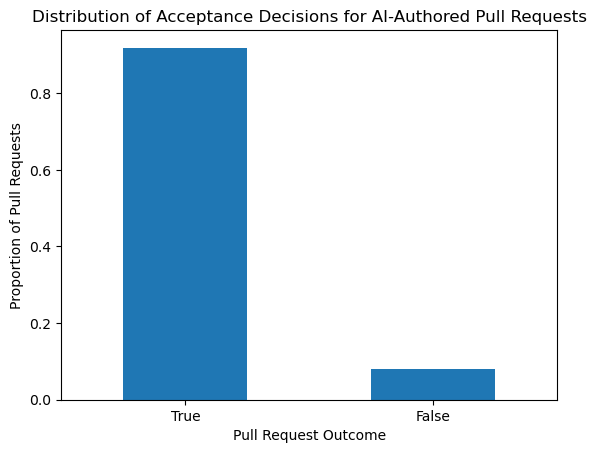

In [30]:
ai_prs["is_merged"].value_counts(normalize=True).plot(
    kind="bar",
    title="Distribution of Acceptance Decisions for AI-Authored Pull Requests",
    ylabel="Proportion of Pull Requests",
    xlabel="Pull Request Outcome",
    rot=0
)

**Criterion 2: How has the volume of AI-authored PRs changed over time?**

In [21]:
ai_prs["created_at"] = pd.to_datetime(ai_prs["created_at"])

In [ ]:
#extract Year–Month
ai_prs["year_month"] = ai_prs["created_at"].dt.to_period("M")

C:\Users\YOGA\AppData\Local\Temp\ipykernel_14564\1976261926.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  ai_prs["year_month"] = ai_prs["created_at"].dt.to_period("M")


In [ ]:
#count AI PRs per month
monthly_ai_prs = (
    ai_prs
    .groupby("year_month")
    .size()
    .reset_index(name="num_ai_prs")
)
#range of years in this data is (2024, 2025)

In [ ]:
#sort values
monthly_ai_prs = monthly_ai_prs.sort_values("year_month")
monthly_ai_prs.head()

,year_month,num_ai_prs
0,2024-12,550
1,2025-01,2426
2,2025-02,3273
3,2025-03,3775
4,2025-04,5428


<Axes: xlabel='year_month'>

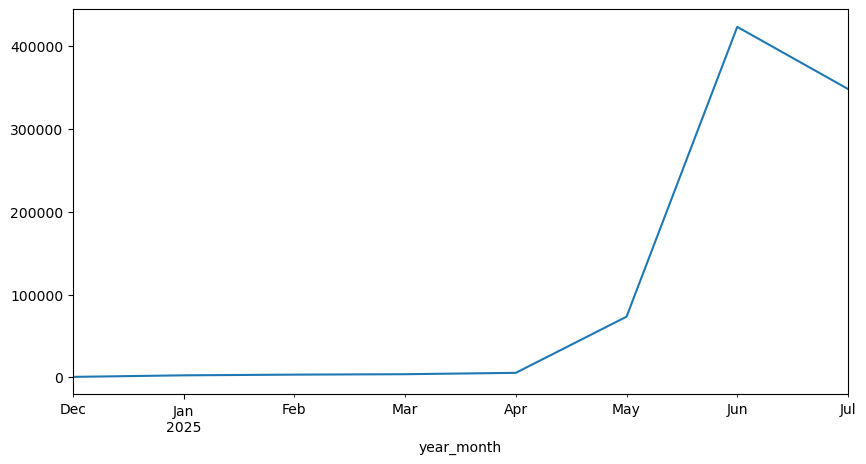

In [25]:
monthly_ai_prs.plot(
    x="year_month",
    y="num_ai_prs",
    figsize=(10,5),
    legend=False
)

In [ ]:
# create the time variable as a sequence of integers
X = np.arange(len(monthly_ai_prs)).reshape(-1, 1)

# extract the number of AI-authored pull requests per time period
y = monthly_ai_prs["num_ai_prs"]

model = LinearRegression().fit(X, y)

model.coef_[0]
#=> a positive value indicates an increasing trend over time

np.float64(56524.24999999999)